##Universidad Autónoma de Chihuahua
##Facultad de Ingeniería
###Maestría en Computación
###Machine Learning
###Modelos de ensamble
####Dra Olanda Prieto Ordaz
####329675 Maritrini Velázquez Ruiz

###EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.xls')

In [3]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke_df = stroke_df.drop(['id'], axis=1)

In [7]:
stroke_df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<ipython-input-8-1e39fd784357>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_df, palette='hls')


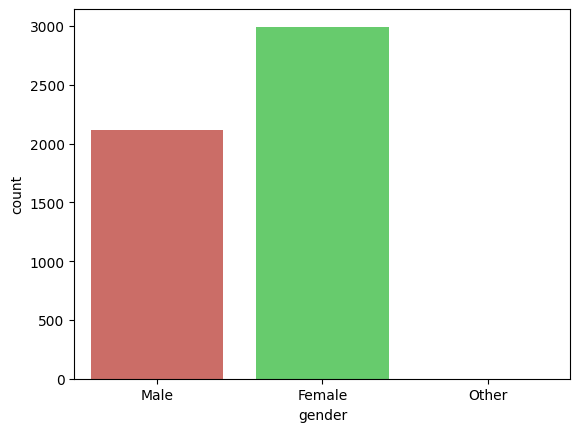

In [8]:
sns.countplot(x='gender', data=stroke_df, palette='hls')
plt.show()

In [9]:
stroke_df.stroke.value_counts()

,count
stroke,
0,4861
1,249


<ipython-input-10-bc0ac6cf8f83>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=stroke_df, palette='hls')


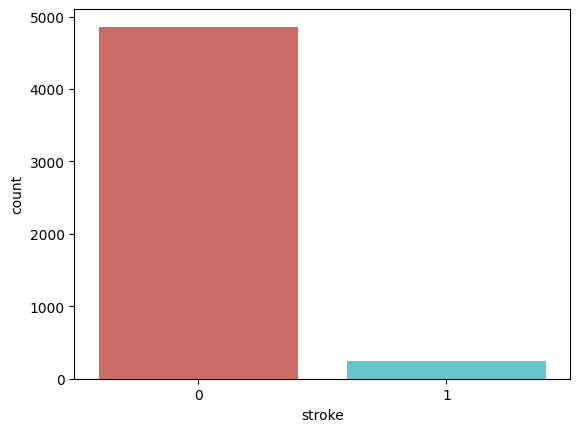

In [10]:
sns.countplot(x='stroke', data=stroke_df, palette='hls')
plt.show()

In [11]:
stroke_df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<ipython-input-12-decf3a307382>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_df, palette='hls')


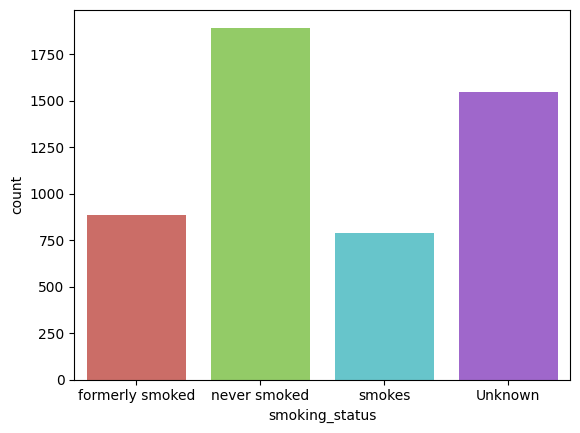

In [12]:
sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
plt.show()

In [13]:
stroke_df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


<ipython-input-14-c9bbda431033>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=stroke_df, palette='hls')


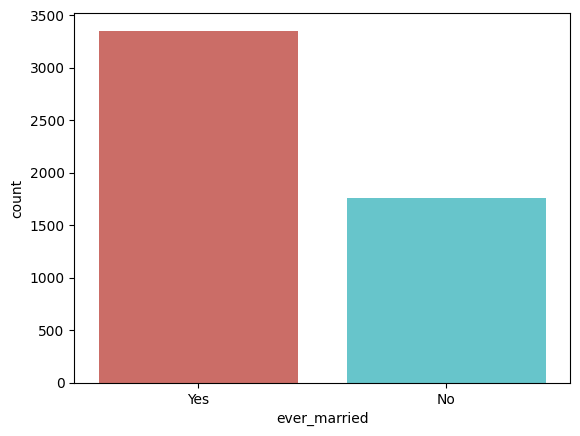

In [14]:
sns.countplot(x='ever_married', data=stroke_df, palette='hls')
plt.show()

In [15]:
stroke_df.work_type.value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<ipython-input-16-942faef22efb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=stroke_df, palette='hls')


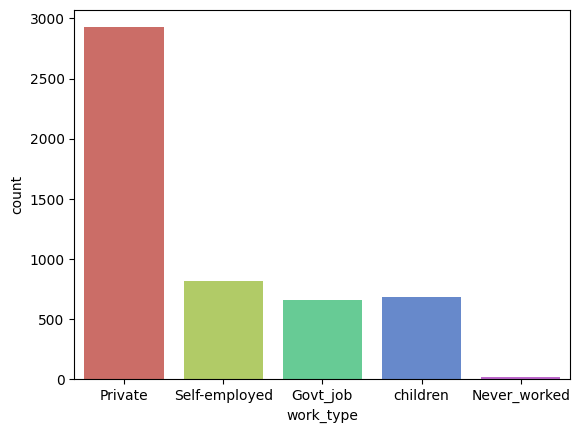

In [16]:
sns.countplot(x='work_type', data=stroke_df, palette='hls')
plt.show()

In [17]:
stroke_df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


<ipython-input-18-710e6d05bed9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=stroke_df, palette='hls')


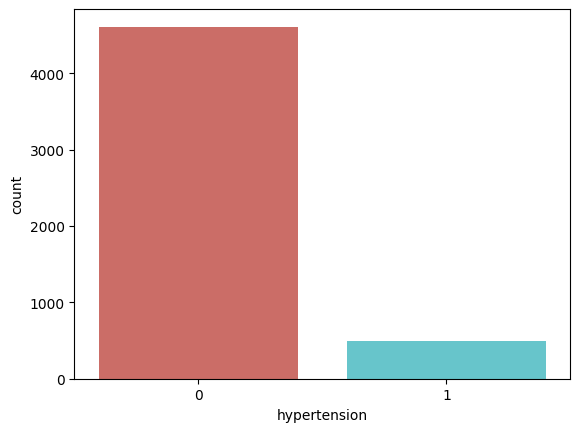

In [18]:
sns.countplot(x='hypertension', data=stroke_df, palette='hls')
plt.show()

In [19]:
stroke_df.heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


<ipython-input-20-f7c747787eaf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=stroke_df, palette='hls')


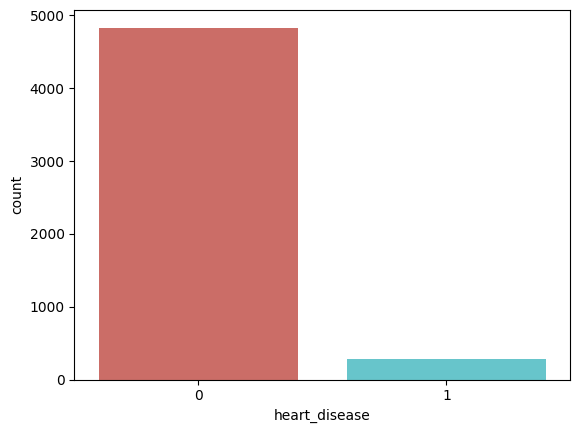

In [20]:
sns.countplot(x='heart_disease', data=stroke_df, palette='hls')
plt.show()

In [21]:
stroke_df.age.value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [22]:
#Rellenar los datos vacios de bmi con el promedio
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #default 'mean'

In [23]:
columns = ['bmi']
stroke_df[columns] = imputer.fit_transform(stroke_df[columns])

In [24]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [25]:
#cambiar atributos categoricos a numericos
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()

In [26]:
stroke_df['gender']=labelEn.fit_transform(stroke_df['gender'])
stroke_df['work_type']=labelEn.fit_transform(stroke_df['work_type'])
stroke_df['Residence_type']=labelEn.fit_transform(stroke_df['Residence_type'])
stroke_df['smoking_status']=labelEn.fit_transform(stroke_df['smoking_status'])
stroke_df['ever_married']=labelEn.fit_transform(stroke_df['ever_married'])

In [27]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [28]:
#eliminar datos redundantes
stroke_df[stroke_df.gender.values > 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,2,26.0,0,0,0,2,0,143.33,22.4,1,0


In [29]:
index=stroke_df[stroke_df.gender.values > 1].index
index

Index([3116], dtype='int64')

In [30]:
stroke_df=stroke_df.drop([stroke_df.index[3116]], axis=0)

In [31]:
##correlation matrix
corr_matrix = stroke_df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
bmi,0.038912
smoking_status,0.028108
Residence_type,0.015415
gender,0.009081


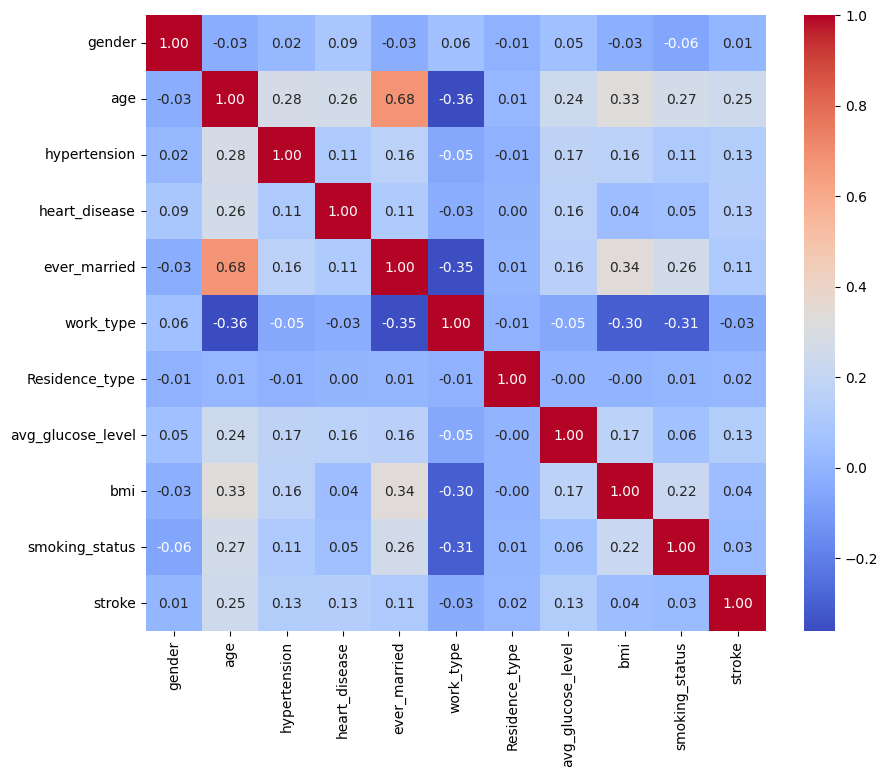

In [32]:
#matriz de correlaciones con el target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True ,fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

In [33]:
#Division de los datos train, test
X = stroke_df.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [34]:
##obtener el target (stroke)
y = stroke_df['stroke']
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [35]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
#balance datos entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [37]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
#escalamiento de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

###Voting Classifiers
Se utilizaran los modelos con los mejores hiperparámetros ya obtenidos en las implementaciones pasadas

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [42]:
log_clf = LogisticRegression(C=0.01, solver='liblinear', max_iter=100, penalty='l2')#'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'

In [43]:
rnd_clf = RandomForestClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=2) #{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1,'min_samples_split': 2}

In [44]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=10)

In [45]:
voting_clf = VotingClassifier(
            estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
            voting='hard')

In [46]:
voting_clf.fit(X_train_scaled_smote, y_train_smote)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.01, solver='liblinear')),
                             ('rf', RandomForestClassifier(max_depth=10)),
                             ('svc', SVC(C=10, gamma=0.1))])

In [47]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_scaled_smote, y_train_smote)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.558382257012394
RandomForestClassifier 0.7403783431180692
SVC 0.6640574037834311
VotingClassifier 0.6634050880626223


In [48]:
y_pred = voting_clf.predict(X_test_scaled)

In [49]:
accuracy_score(y_test, y_pred)

0.6634050880626223

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1458
           1       0.08      0.53      0.13        75

    accuracy                           0.66      1533
   macro avg       0.52      0.60      0.46      1533
weighted avg       0.92      0.66      0.76      1533



In [51]:
conf = confusion_matrix(y_test, y_pred)

In [52]:
print(conf)

[[977 481]
 [ 35  40]]


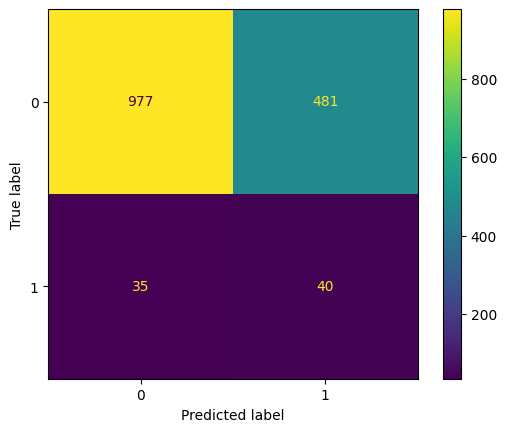

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=voting_clf.classes_)
disp.plot()
plt.show()

In [54]:
log_clf2 = LogisticRegression()
svc_clf2 = SVC()
rnd_clf2 = RandomForestClassifier()
voting_clf2 = VotingClassifier(
            estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svc_clf2)],
            voting='hard')

In [55]:
voting_clf2.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [56]:
for clf in (log_clf2, rnd_clf2, svc_clf2, voting_clf2):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9510763209393346
RandomForestClassifier 0.9504240052185258
SVC 0.9510763209393346
VotingClassifier 0.9510763209393346


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


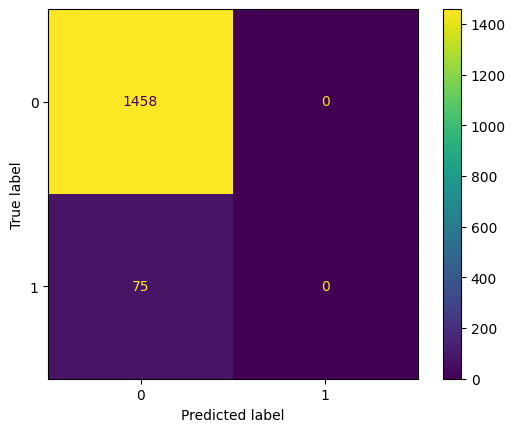

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=voting_clf.classes_)
disp.plot()
plt.show()

###AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, estimator=rnd_clf)

In [60]:
ada_clf.fit(X_train_scaled_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10),
                   learning_rate=0.5, n_estimators=200)

In [61]:
y_pred_ada = ada_clf.predict(X_test_scaled)

In [62]:
accuracy_score(y_test, y_pred_ada)

0.8336594911937377

In [63]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1458
           1       0.09      0.25      0.13        75

    accuracy                           0.83      1533
   macro avg       0.52      0.56      0.52      1533
weighted avg       0.91      0.83      0.87      1533



In [64]:
print(confusion_matrix(y_test, y_pred_ada))

[[1259  199]
 [  56   19]]


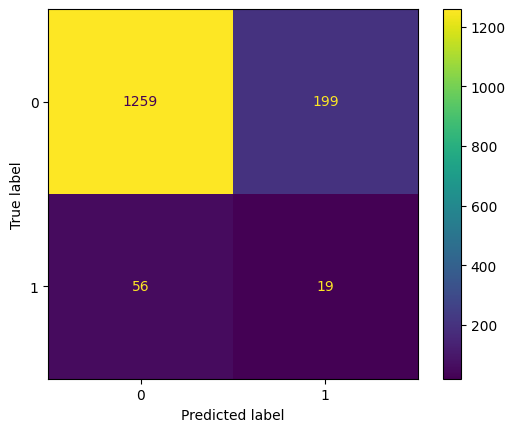

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_ada), display_labels=ada_clf.classes_)
disp.plot()
plt.show()

In [66]:
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=2,min_samples_split=2)#{'criterion': 'gini','max_depth': 10,'min_samples_leaf': 2,'min_samples_split': 2}
ada_clf2 = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, estimator=dt_clf)

In [67]:
ada_clf2.fit(X_train_scaled_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    min_samples_leaf=2),
                   learning_rate=0.5, n_estimators=200)

In [68]:
y_pred_ada2 = ada_clf2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_ada2)

0.8421395955642531

In [69]:
print(classification_report(y_test, y_pred_ada2))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1458
           1       0.10      0.29      0.15        75

    accuracy                           0.84      1533
   macro avg       0.53      0.58      0.53      1533
weighted avg       0.92      0.84      0.88      1533



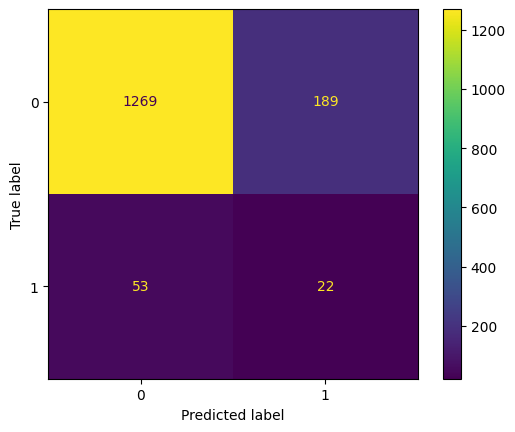

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_ada2), display_labels=ada_clf2.classes_)
disp.plot()
plt.show()

###Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5)

In [73]:
grad_boost_clf.fit(X_train_scaled_smote, y_train_smote)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)

In [74]:
y_pred_grad = grad_boost_clf.predict(X_test_scaled)

In [75]:
accuracy_score(y_test, y_pred_grad)

0.6157860404435747

In [76]:
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1458
           1       0.05      0.36      0.08        75

    accuracy                           0.62      1533
   macro avg       0.50      0.49      0.42      1533
weighted avg       0.91      0.62      0.72      1533



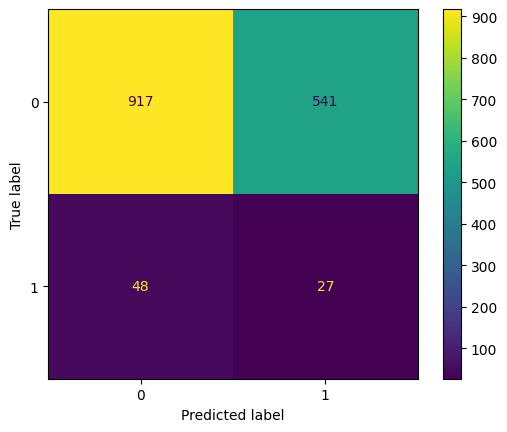

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_grad), display_labels=grad_boost_clf.classes_)
disp.plot()
plt.show()

In [78]:
##mejores hiperparametros
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 0.2,0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

In [79]:
best_grad_boost = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')

In [80]:
best_grad_boost.fit(X_train_scaled_smote, y_train_smote)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [81]:
best_grad_boost.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

In [82]:
y_pred_grad2 = best_grad_boost.predict(X_test_scaled)

In [83]:
accuracy_score(y_test, y_pred_grad2)

0.644487932159165

In [84]:
print(classification_report(y_test, y_pred_grad2))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1458
           1       0.05      0.32      0.08        75

    accuracy                           0.64      1533
   macro avg       0.50      0.49      0.43      1533
weighted avg       0.91      0.64      0.75      1533



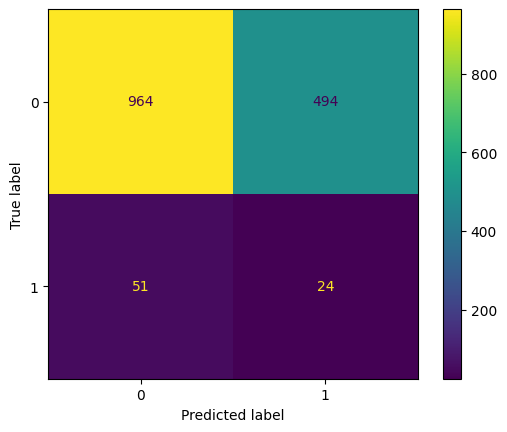

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_grad2), display_labels=best_grad_boost.classes_)
disp.plot()
plt.show()

###Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [88]:
bag_clf.fit(X_train_scaled_smote, y_train_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [89]:
y_pred_bag = bag_clf.predict(X_test_scaled)

In [90]:
accuracy_score(y_test, y_pred_bag)

0.5799086757990868

In [91]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72      1458
           1       0.08      0.77      0.15        75

    accuracy                           0.58      1533
   macro avg       0.53      0.67      0.44      1533
weighted avg       0.94      0.58      0.69      1533



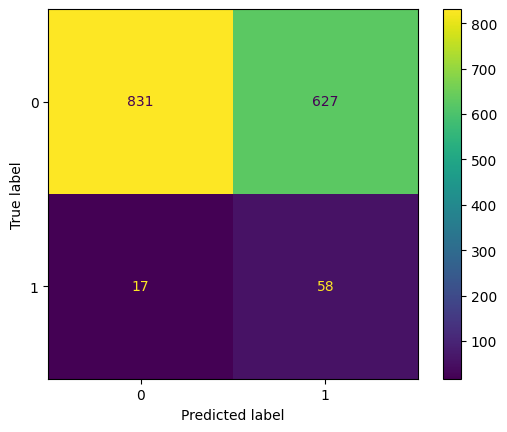

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bag), display_labels=bag_clf.classes_)
disp.plot()
plt.show()

In [93]:
##usar gird search
param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
}

In [94]:
best_bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid_bag, cv=5, scoring='recall')

In [95]:
best_bag.fit(X_train_scaled_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'bootstrap': [True, False], 'max_features': [0.5, 1.0],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

In [96]:
best_bag.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 100}

In [97]:
y_pred_bag2 = best_bag.predict(X_test_scaled)

In [98]:
accuracy_score(y_test, y_pred_bag2)

0.817351598173516

In [99]:
print(classification_report(y_test, y_pred_bag2))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1458
           1       0.05      0.16      0.08        75

    accuracy                           0.82      1533
   macro avg       0.50      0.51      0.49      1533
weighted avg       0.91      0.82      0.86      1533



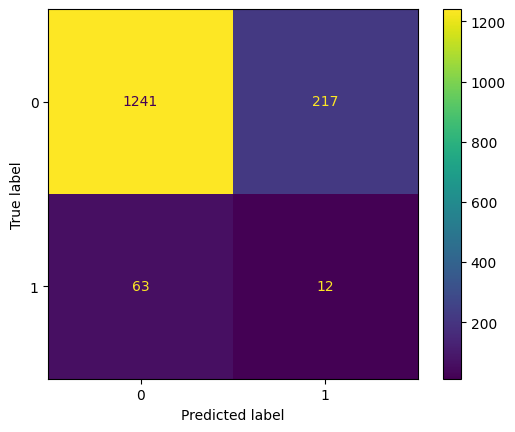

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bag2), display_labels=best_bag.classes_)
disp.plot()
plt.show()

###XGBOOST

In [101]:
!pip install xgboost

In [102]:
import xgboost as xgb

In [103]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.5)

In [104]:
xgb_clf.fit(X_train_scaled_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [106]:
accuracy_score(y_test, y_pred_xgb)

0.5303326810176126

In [107]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.52      0.68      1458
           1       0.07      0.67      0.12        75

    accuracy                           0.53      1533
   macro avg       0.52      0.59      0.40      1533
weighted avg       0.92      0.53      0.65      1533



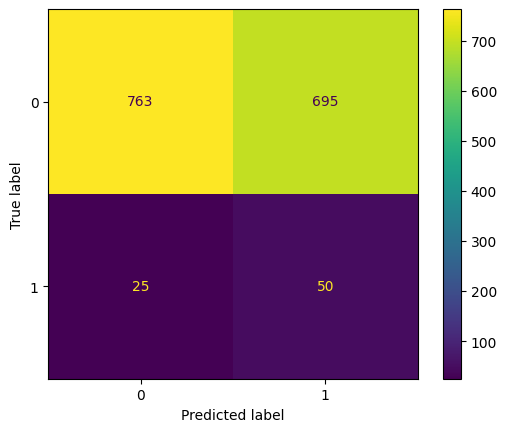

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb), display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

In [109]:
##busqueda de mejores hiper parametros
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [2,3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [110]:
xgb_clf2 = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5,n_jobs=-1)

In [111]:
xgb_clf2.fit(X_train_scaled_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]})

In [112]:
y_pred_xgb2 = xgb_clf2.predict(X_test_scaled)

In [113]:
accuracy_score(y_test, y_pred_xgb2)

0.5225048923679061

In [114]:
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.98      0.51      0.67      1458
           1       0.08      0.77      0.14        75

    accuracy                           0.52      1533
   macro avg       0.53      0.64      0.40      1533
weighted avg       0.93      0.52      0.64      1533



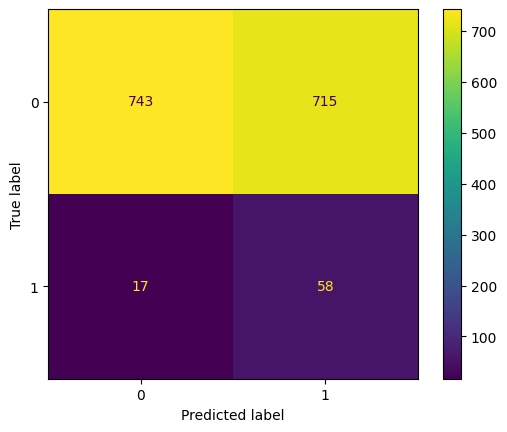

In [115]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb2), display_labels=xgb_clf2.classes_)
disp.plot()
plt.show()

###Análisis de Resultados y Conclusiones
de todos los modelos de ensamble, el modelo AdaBoost mostró tener rendimiento alto en cuestión del "accuracy", clasificando 19 de los 75 ejemplos de la etiqueta 1 (stroke) correctamente. En cambio modelos como el Bagging classifier y el XGBoost, tuvieron un accuracy bajo, pero pudieron clasificar la mayoria de los ejemplos de la etiqueta 1 correctamente.